# Predicting Breast Cancer Survival and Identifying Biomarkers for Survival

To better understand a patient’s potential outcome after being diagnosed with a genetic disorder or disease, it is important to understand how specific features of the disease and aberrations in the individual's genetic make-up could be affecting their survival. Breast cancer is when the proliferation of cells within the breast tissue increases and forms a tumor, with the potential of these over-proliferating cells migrating to other regions of the body.

According to breastcancer.org, more than 3.5 million women will have had or currently have breast cancer in the United States as of January 2020, and men have a 1 in 883 chance of developing breast cancer in their lifetime. By identifying a relationship(s) between disease state factors, such as treatment type, tumor characteristics, and changes in gene expression, the patients’ outcome from breast cancer could potentially be predicted and improved.

## <u>The Experimental Approach and Resulting Data </u>

### Data Wrangling and Initial Findings

A <a href="https://data.world/deviramanan2016/nki-breast-cancer-data/workspace/project-summary?agentid=deviramanan2016&datasetid=nki-breast-cancer-data" target="_blank">data set</a> from the Netherlands Cancer Institute (NKI) was utilized in the analyses. The data set was already cleaned with no missing values, with a shape of 272 rows and 1,570 columns. Thus, not much data wrangling was initially required. The nonessential features of 'Patient', 'ID', and 'barcode' were removed. Because the values in the columns have different magnitudes and because the data is both categorical and continuous in nature, the data was standardized

This study sampled 272 breast cancer patients, and the variables in the dataset are defined in Table 1 below:

#### Table 1: Description of Variables in NKI Breast Cancer Data Set

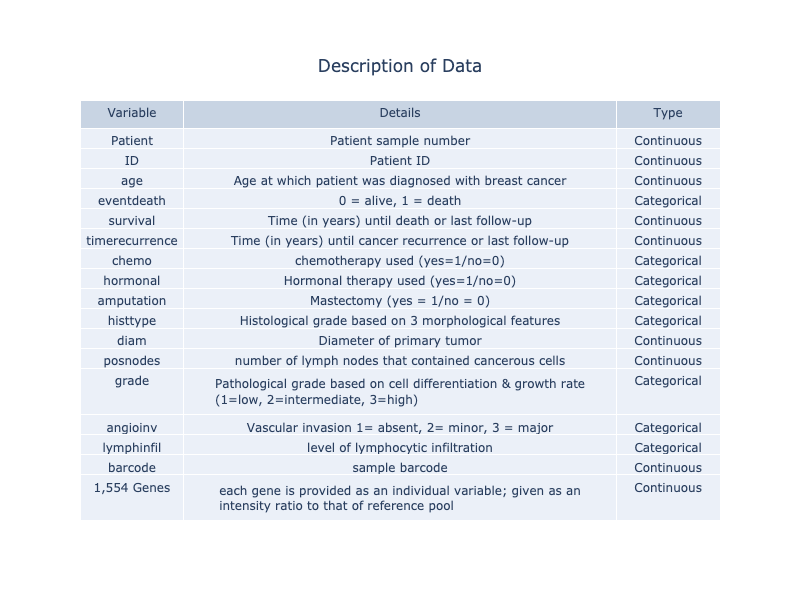

Using the 'eventdeath' feature to divide the data into 2 groups (those individuals who survived and those that did not survive), 195 of the patients survived, whereas 77 did not survive at the end of the study. As shown in Figure 1, the patients that survived, lived longer than those patients that did not survive. The difference in survival times between these two groups is significantly different (Figure 2).

#### Figure 1: Survival Time in Breast Cancer Patients

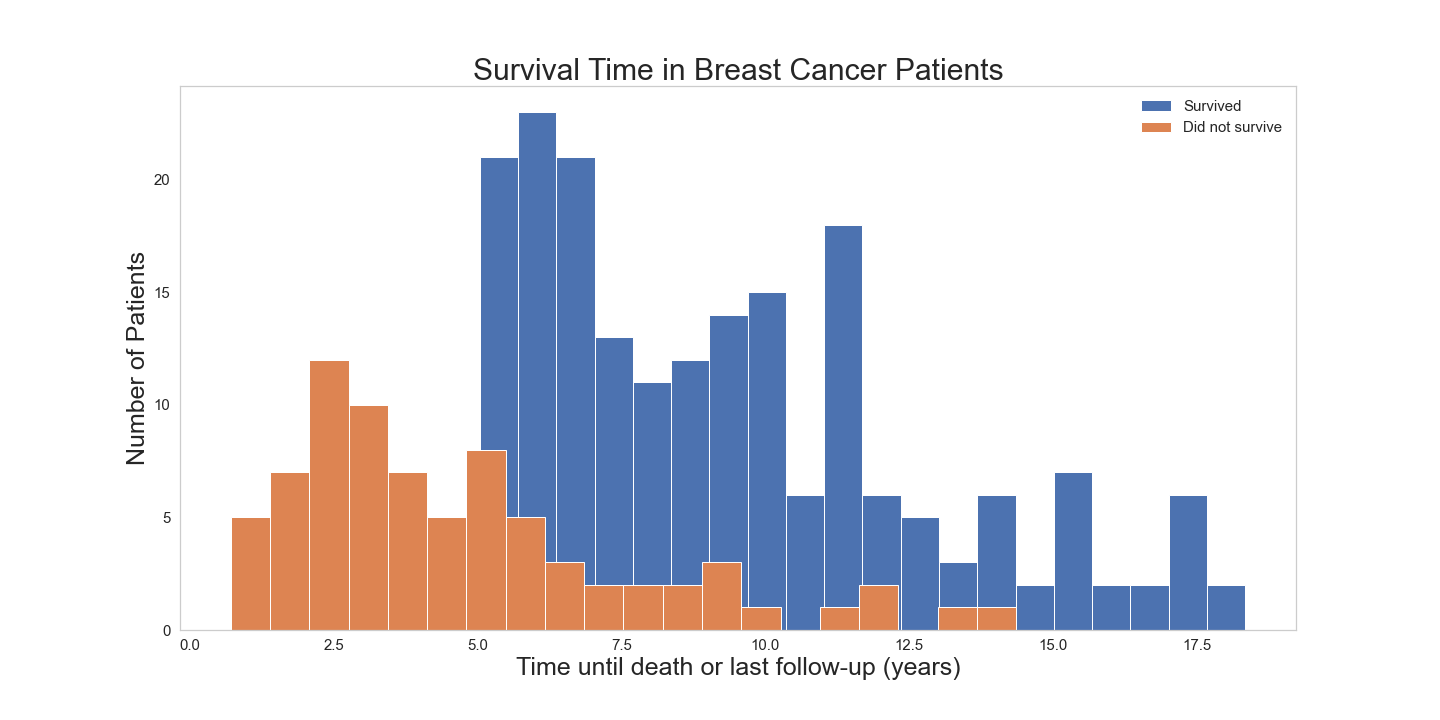

#### Figure 2: Survival Time in Breast Cancer Patients
The mean survival time (black squares) for breast cancer patients is 9.4 years; whereas, it is 4.7 years for those that did not survive (t-test p-value <= 1.00e-04). Individual patients are represented by gray circles for each group.

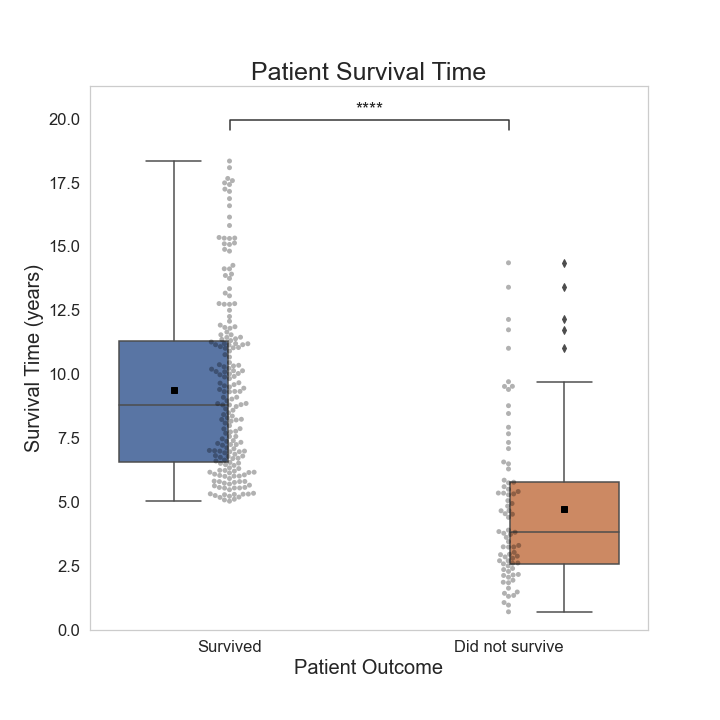

The data set includes the expression levels of 1,554 genes measured in the breast cancer patients. The expression levels of these genes are represented by an intensity ratio relative to a reference pool of expression levels. Therefore, the expression levels range from -2 to 2.

To begin to address whether there are differences in gene expression levels in patients that survive compared with those that did not survive, the mean expression level of each gene was determined for the two groups of patients. If there was no difference in expression, a 1:1 linear relationship would result. However, when the mean levels are compared, there are several genes that display differences between the two groups (Figure 3). This suggests that these genes may be potential biomarkers in determining breast cancer survival.

#### Figure 3: Comparison of Mean Gene Expression Levels
The mean expression level was determined for 1,554 genes (blue circles) for 2 groups of breast cancer patients (patients who survived and those who did not survive). The red dashed line represents a 1:1 linear relationship between expression levels for both groups). The blue solid line is the regression line formed from all mean expression levels.

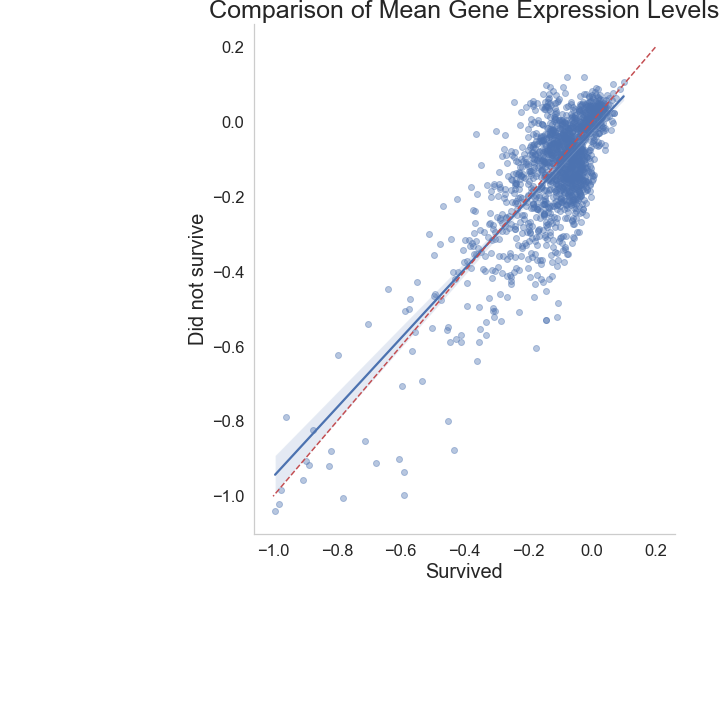

### Modeling to predict survival of breast cancer patients

Is it possible to predict breast cancer patient survival given several features, including: a) treatment type, b) tumor characteristics, and c) aberrations in gene expression (see Table 1)? Given the initial findings above, three models were examined with the goal of forming a low-complexity model that can predict patient survival given the features listed in Table 1.

The models tested were:
1. Logistic Regression
2. Random Forest
3. Survival Analysis (using Cox Proportional Hazard)

Models 1 and 2 listed above are different in concept from Model 3. Models 1 and 2 calculate the probability of an event happening or classifying an event given the features used in the model. Model 3 is used to explore the relationship between the survival of a subject and the explanatory variables, where the response variable (survival) is the hazard function at a given time. The performances of Models 1 and 2 will be compared with each other, and Model 3 will be described separately.

#### Logistic Regression Model vs. Random Forest Model

After splitting and training the data, the models were tuned. It was determined that for the Logistic Regression Model the hyperparameter C would be set to 1000, and for the Random Forest Model, the hyperparamters n_estimators and citerion were determined to be 67 and gini, respectively. The performance of the models was then assessed with the test data. 

Figures 4 and 5 show the confusion matrices of the two models. The Receiver Operating Characteristic (ROC) curve illustrates the tradeoff between a true positive (Do not survive) and a false positive (Survive). The area under the ROC curve (AUC) can aid in determining how well a model classifies positive and negative outcomes. The closer the AUC value is to 1, the better the model. Figure 6 show the ROC curves and AUC values for both models.

#### Figure 4: Logistic Regression Confusion Matrix
Out of the 19 (16 + 3) predicted to be positive, 16 were correctly identified.

Out of the 21 (5 + 16) positive cases, 16 were correctly identified.

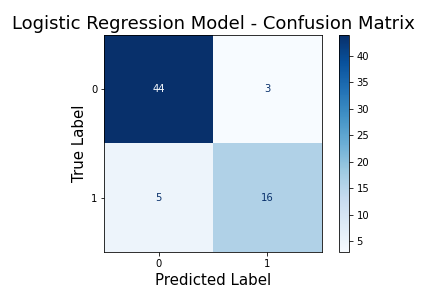

#### Figure 5: Random Forest Confusion Matrix
Out of the 17 (14 + 3) predicted to be positive, 14 were correctly identified.

Out of the 21 (7 + 14) positive cases, 14 were correctly identified.

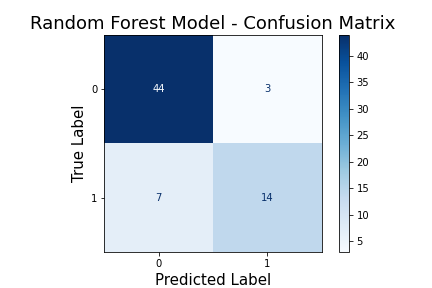

#### Figure 6: ROC Curves for Logistic Regression and Random Forest Models
Receiver Operating Characteristic (ROC) curves and AUC values for the two models. The Logistic Regression Model displays a higher AUC value.

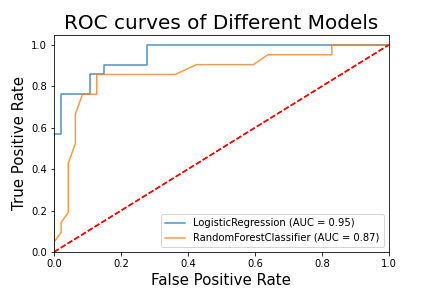

Using the prediction information from the models above, several metrics were calculated to determine which model would perform better. 

The model will be chosen based on the following criteria:
1. Higher Precision
2. Higher Recall
3. Higher F1 Score
4. Higher Accuracy
5. Higher AUC

#### Table 2: Metrics Comparing the Logistic Regression and Random Forest Models

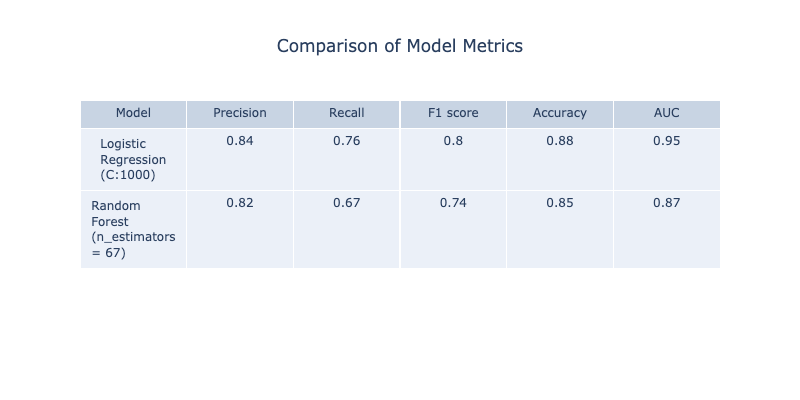

Based on the metrics above, the Logistic Regression Model (C:1000) performs better than the Random Forest Model. 

#### Summary of the Cox Proportional Hazard Survival Analysis Model

After splitting the data set into training and test data, the Cox Proportional Hazard Model was run. 

The concordance index (ci) will evaluate the predictions made by an algorithm. It is the proportion of concordant pairs divided by the total number of possible evaluation pairs. Concordance index values close to 0.5 indicate that the risk score predictions are not better than random. Whereas, ci values close to 1 indicate that the risk scores are good at determining which patients will be affected. A good model has a ci value over 0.7; whereas a strong model has a ci value over 0.8. A value of 1 means that the model perfectly predicts those group members who will experience a certain outcome and those who will not. **The ci value for the Cox PH Model is 0.72.** Thus, it can be considered to be a good model. Because the data is right-censored, where we do not know the final outcome of some of the patients because the study ended before death occurred, the ci value cannot be considered to be the AUC value. 

Calibration is the propensity of the model to get probabilities correct over time. To get an idea of the model's accuracy, the calibration over prediction time can be examined by finding the Brier score loss, which ranges from 0 to 1. The smaller the Brier score loss (the closer to 0), the lower the difference between the predicted probability and the actual outcome, and thus the more accurate the model. The calibration curve is shown in Figure 7, where the calibration loss ranges from around 0.21 to approximately 0.29.

#### Figure 7: Calibration Curve for Cox Proportional Hazard Model

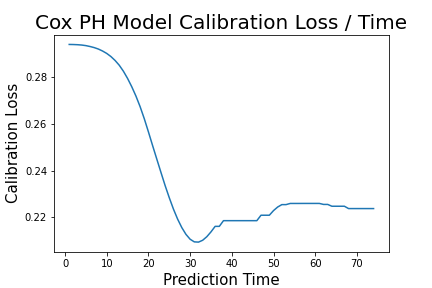

Given that the ci value for the Cox PH Model suggests the model is a good model (and not a strong model), and because of the Brier scores depicted above, the Logistic Regression Model will be the model proposed to be used to predict breast cancer patient survival (survive or not survive).

### Identifying specific genes that may serve as biomarkers for breast cancer survival

Being able to identify specific genes that are affecting breast cancer patient survival may provide an avenue of scientific exploration for specific biomarkers of the disease as well as therapeutic targets. Because the logistic regression model will be suggested as the model to predict patient outcome, the genes identified as influencing patient outcome will be addressed below.

The Logistic Regression Model is a classification model with classes 0 (survived) and 1 (did not survive). The coefficients obtained from the tuned model are both positive and negative and are used to determine whether a change in a feature makes the event more likely (positive) or less likely (negative). The positive scores indicate a feature that predicts class 1 (did not survive), whereas the negative scores indicate a feature that predicts class 0 (survived). Holding the other features constant, the top ten positive and top ten negative coeffients are shown in Figures 8 and 9, respectively.

#### Figure 8: Top Ten Features with Positive Coefficients
These features would be involved in predicted those breast cancer patients that did not survive.

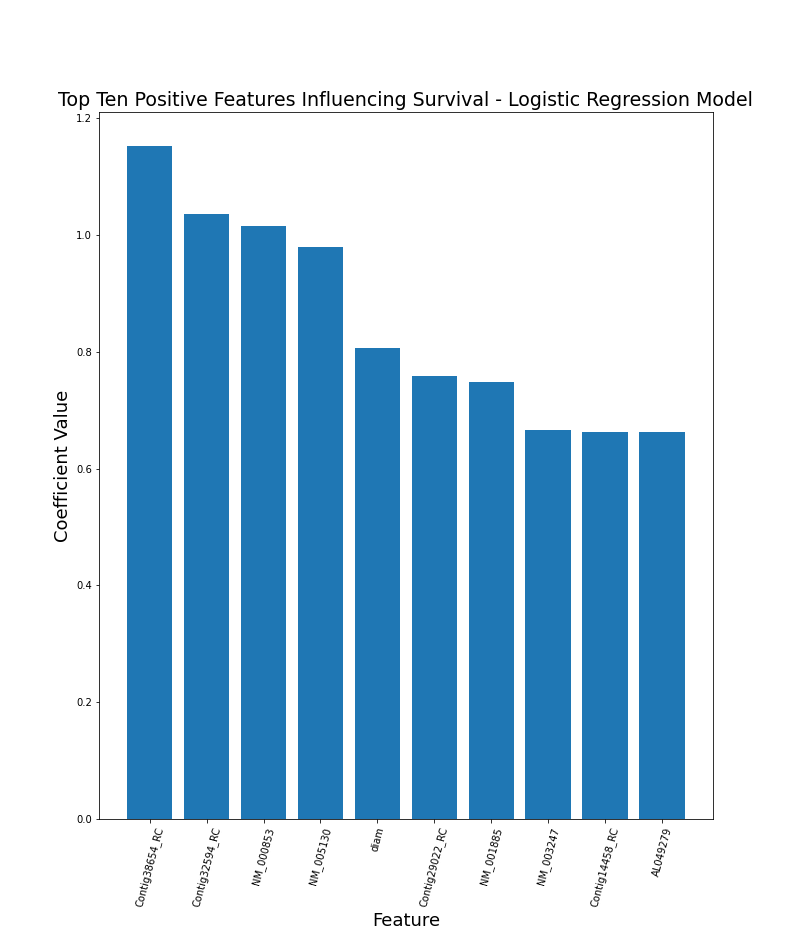

#### Figure 9: Top Ten Features with Negative Coefficients
These features would be involved in predicted those breast cancer patients that did survive.

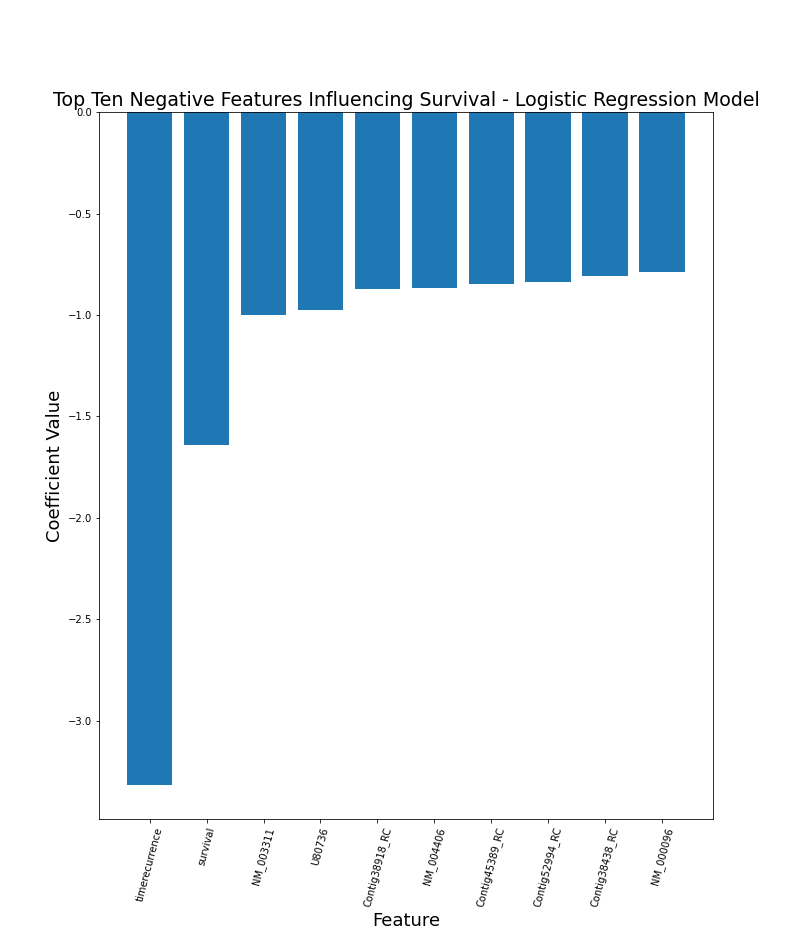

To investigate whether there are differences in gene expression associated with survival, th expression levels between those individuals who survived ('eventdeath = 0') and those that did not ('eventdeath' = 1) were examined. After performing some data wrangling, the means for each feature were compared between the two groups using an independent samples t-test. The features that displayed a potentially significant difference (p-value <= 0.05) were then identified. 

**Out of the 1,573 features, 618 display a significant difference between individuals who survived and individuals who did not**

From the list of 618 features that have a p-value <= 0.05, the features that have a fold change in expression of >2 or <-2 for between those individuals that survived and those that did not were determined. This will help narrow down the potential features that could influence breast cancer survival.

**There are 217 features that display a pvalue <=0.05 and fold change <=-2 or >=2.**

From the identified 217 features, the ten features that exhibit the greatest p-values are shown in Table 3.

#### Table 3: Ten Features with the Greatest p-values Between Two Groups of Breast Cancer Patients

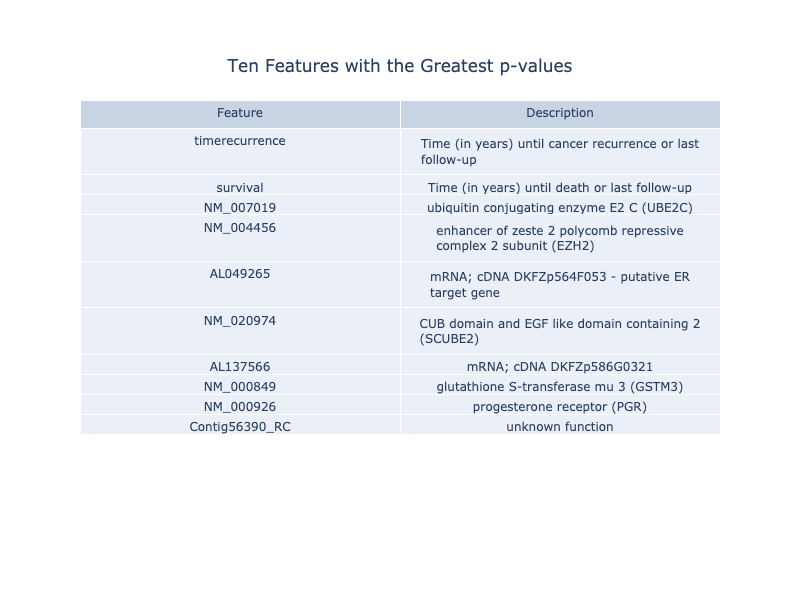

The 217 features identified above and the top 10 features from the Logistic Regression Model that determine whether a change in a feature makes the event more or less likely were compared to identify overlapping features. These features are given in Table 4. It is interesting to note that glutathione S-transferase theta-1 has previously been implicated in breast cancer development. This provides validation that features that influence breast cancer patients can be identified through these analyses.

#### Table 4: Significantly Different Features Identified in Logistic Regression Model to Influence Patient Survival

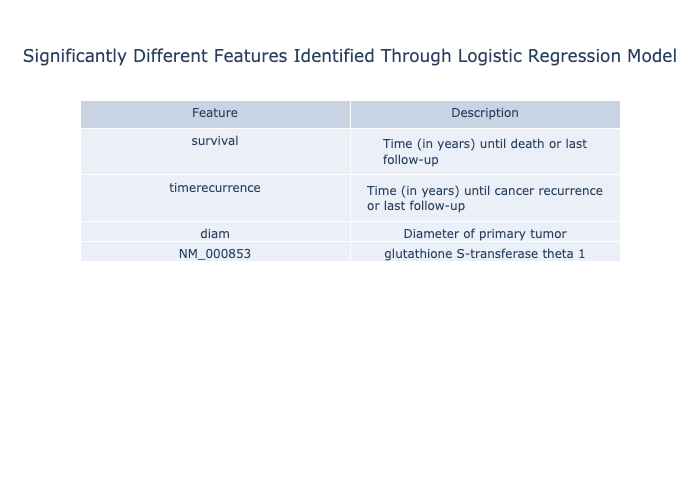

## <u>Future Directions and Recommendations </u>

The analyses and findings described above provide a model for predicting which breast cancer patients will survive. In addition, several genes were identified that may serve as specific biomarkers for survival and potential therapeutic targets for breast cancer treatment.

While the data set provides measurements of the levels of 1,554 genes, it does not include information regarding the biological role of the proteins these genes encode. By knowing which proteins function within the same or parallel biological pathway with other proteins, it is plausible to find a relationship (positive or negative) between the measured levels of expression between the two patient groups. This may provide useful to hypothesize whether a gene that was not examined would affect survival and be a potential biomarker or therapeutic target.

Further research could expand the analyses and models performed on the data set. Here, the data set was relatively small, and having additional data to add or use as a "test" in the machine learning analysis would have proven useful in testing the model.

In these analyses, only Logistic Regression, Random Forest, and Cox Proportional Hazard models were tested. It would be worth test other models such as support vector machine, neural networks, and extreme boost modelling.

In addition, the data set did not include patients without breast cancer. Continued research could add this data to examine whether other features, especially gene expression levels, are relevant in determining which individuals will be affected by this disease.

The findings from the analyses described could prove to be useful for future studies, including:
* providing physician’s, researchers, and patients with recommended treatments, therapies, and pharmaceutical drugs to target aberrant gene expression
* academic or pharmaceutical researchers could test novel therapeutic targets for cancerous cells based on a tumor’s specific characteristics and gene expression analyses, starting with the genes identified here
* testing novel avenues for therapies and improving patient outcome